<a href="https://colab.research.google.com/github/meena25091992/online_retail_customer_segmentation/blob/main/Group_Copy_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Meenakshi_Unsupervised_Customer_Segmentation_Project/Online Retail.xlsx'

In [ ]:
# Reading our Dataset
data = pd.read_excel(file_path)

In [ ]:
# head gives the top 5 rows of the given dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
#info() print the basic information of our DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#  Shape give the total number of rows and columns
print('Rows : {} , Columns : {} '.format(data.shape[0], data.shape[1]))



Rows : 541909 , Columns : 8 


# Preprocessing the dataset

* **Handling NULL values:-**

In [ ]:
# lets check the total null values in our dataset.
# .sort_values sorting the dataset in ascending order and if you want to make it reverse just write False in bracket.
print(data.isna().sum().sort_values(ascending = False))

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


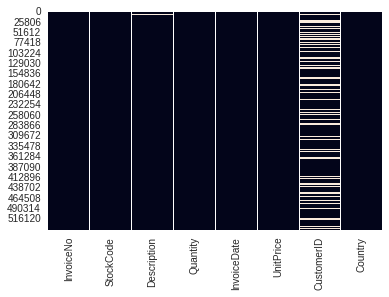

In [ ]:
# Plot the heat map to show the occurance of missing values in our dataframe
sns.heatmap(data.isnull(), cbar=False)


**From the above heat map, we can say that:**
* Some values are missing in Description column 
* There are lots of missing values in CustomerID column

* **Handling duplicate values:-**

In [ ]:
# dropping all the missing values from our dataset 
data.dropna(inplace=True)

In [ ]:
# find the sum of missing values to check whether any missing value is left or not
data.isna().sum().sort_values()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Checking the totol number of duplicate values 
print('Duplicate values in our dataset is:',len(data[data.duplicated()]))

Duplicate values in our dataset is: 5225


In [ ]:
# Dropping the duplicate values from the dataset
data.drop_duplicates(inplace = True)

In [ ]:
# Rows and column left after removing duplicate and null values
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 401604 , Columns 8


* After dropping Null and duplicate values we see that 401604 rows and 8 columns are there in this dataset.
* We have to drop some Invoice No which are starts with 'C' because 'C' indicates a cancellation

In [ ]:
# Creating a copy of dataframe 
customer_seg_df = data.copy()

* Here we creating a copy of dataframe because whatever we applying a conditions on new data so that it doesn't affect our original dataset.

# Checking for the rows which are cancelled

In [ ]:
# Lets check the InvoiceNo that starts with 'C'.Here 'C' denotes cancellation 
customer_seg_df[customer_seg_df['InvoiceNo'].str.contains("C") == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


* **Here, column 'InvoiceNo' is of Object type**

In [ ]:
customer_seg_df.InvoiceNo.dtypes

dtype('O')

* **So,we need to convert it into 'str' type**

In [ ]:
# First converting the column as string
customer_seg_df['InvoiceNo'] = customer_seg_df['InvoiceNo'].astype('str')

In [ ]:
# We have to deal with those data of InvoiceNo which not containing 'C'
customer_seg_df = customer_seg_df[~customer_seg_df['InvoiceNo'].str.contains('C')]
customer_seg_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Rows and column left after removing duplicate and null values
print('Rows {} , Columns {}'.format(customer_seg_df.shape[0], customer_seg_df.shape[1]))

Rows 392732 , Columns 8


* **Now,the shape of that are not the dataframe got changed which contain only those transaction that are not cancelled**

In [ ]:
# Count the no. of rows in each column
customer_seg_df.count()

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
dtype: int64

# Exploratory Data Analysis

# Find the top 5 products which have maximum sales.

In [ ]:
# Find the count of each product and then select top 5 using head() method
top_5_prod_df = pd.DataFrame(customer_seg_df['Description'].value_counts().head(5).reset_index().values,columns=['Description','Count'])
top_5_prod_df

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


Text(0, 0.5, 'Total Sales')

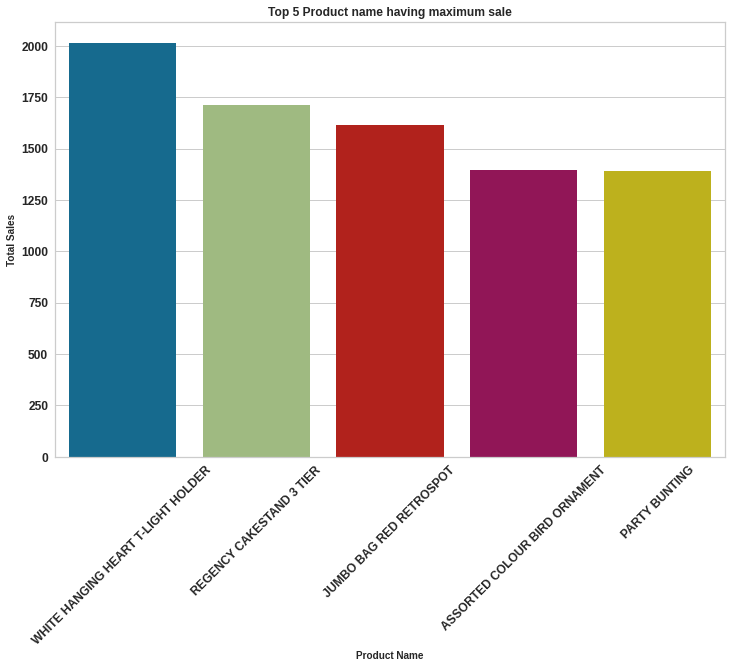

In [ ]:
# Count plot to show top 5 products
plt.figure(figsize = (12,8))
plt.title('Top 5 Product name having maximum sale' ,  fontweight = 'bold')
sns.barplot(x = 'Description',y = 'Count', data = top_5_prod_df )
plt.xticks(rotation = 45 , fontweight = 'bold' , fontsize = 12)
plt.yticks(fontweight = 'bold' , fontsize = 12)
plt.xlabel('Product Name',fontweight = 'bold' , fontsize = 10)
plt.ylabel('Total Sales', fontweight = 'bold' , fontsize = 10)

# Conclusion
From the above graph,we conclude that the top-most 5 selling products are:
* WHITE HANGING HEART T-LIGHT HOLDER 	
* REGENCY CAKESTAND 3 TIER
* JUMBO BAG RED RETROSPOT
* ASSORTED COLOUR BIRD ORNAMENT
* PARTY BUNTING


# Find out the top 5 countries which have maximum orders.

In [ ]:
# Top 10 countries who's buying maximum products
Top_10_country = customer_seg_df['Country'].value_counts().reset_index()
Top_10_country['Country_per']= Top_10_country['Country']*100/customer_seg_df['Country'].count()     # Add country percentage column to top 10 countries data frame
Top_10_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_10_country.head()

,Country_Name,Count,Country_per
0,United Kingdom,349227,88.922471
1,Germany,9027,2.298514
2,France,8327,2.120275
3,EIRE,7228,1.840441
4,Spain,2480,0.631474


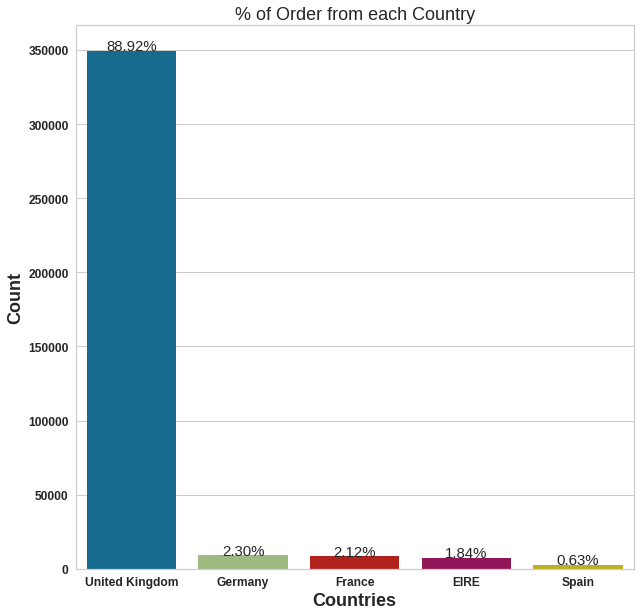

In [ ]:
# Barplot of Top 10 countries who's buying maximum products
fig, ax = plt.subplots(figsize = (10,10))
splot = sns.barplot(x='Country_Name',y='Count',data=Top_10_country.head())
plt.title('% of Order from each Country', SIZE = 18)
plt.xlabel('Countries', SIZE = 18 , fontweight = 'bold')
plt.ylabel('Count', SIZE = 18, fontweight = 'bold')
plt.xticks(fontweight = 'bold' , fontsize = 12)
plt.yticks(fontweight = 'bold' , fontsize = 12)
for p in splot.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/customer_seg_df.shape[0]*100),ha = "center", SIZE = 15)

# Conclusion
From the above barplot,we conclude that:
* Maximum orders are recieved from United Kingdom (Around 90% market covering).Since,company is a UK based online retail.
* After UK the top-most countries from where orders received are Germany, France, EIRE, etc.

# Find the number of customers who are buying the products over a time-period of one year

In [ ]:
# customer distribution in 1 year time period
customer_distribution = customer_seg_df.groupby('InvoiceDate')['CustomerID'].count().reset_index(name="Total_Customers")
customer_distribution

,InvoiceDate,Total_Customers
0,2010-12-01 08:26:00,7
1,2010-12-01 08:28:00,2
2,2010-12-01 08:34:00,16
3,2010-12-01 08:35:00,1
4,2010-12-01 08:45:00,20
...,...,...
17281,2011-12-09 12:23:00,2
17282,2011-12-09 12:25:00,2
17283,2011-12-09 12:31:00,21
17284,2011-12-09 12:49:00,4


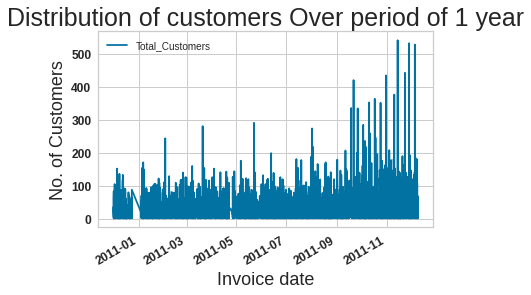

In [ ]:
#  plot scatter graph to show no. of customers who are buying prodcut over a time-period of 1 year
customer_distribution.plot.line(x='InvoiceDate', y='Total_Customers')
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=18)
plt.ylabel('No. of Customers', size=18)
plt.xticks(fontweight = 'bold' , fontsize = 12)
plt.yticks(fontweight = 'bold' , fontsize = 12)
plt.show()

# Conclusion
From the above line plot,we have seen that:
* There are more no. of customers between Oct,2011 to Nov,2011. 
* Customers are fluctuating between Jan,2011 to Sep,2011.

# Checking the number of cancelled orders country-wise

In [ ]:
# Let us now look at the number of canceled orders in the data.
# boolean series returned with False at place of NaN
bool_series = data["InvoiceNo"].str.startswith('C', na=False)
# displaying filtered dataframe
cancel_order = data[bool_series]
cancel_order[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [ ]:
cancel_order.shape

(8872, 8)

In [ ]:
# Find the top 10 countries in which no. of cancelled orders are maximum

cancel_order_country_top10 = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()
cancel_order_country_top10 = cancel_order_country_top10.sort_values('InvoiceNo',ascending=False, ignore_index=True)
cancel_order_country_top10.rename(columns={'InvoiceNo': 'Cancel_Order'}, inplace=True)
cancel_order_country_top10.head(10)

,Country,Cancel_Order
0,United Kingdom,7501
1,Germany,453
2,EIRE,247
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


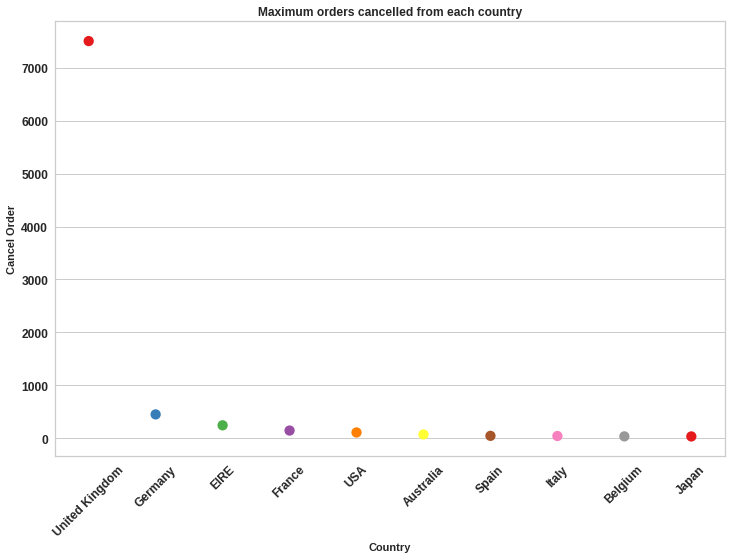

In [ ]:
#  plot the line graph of seaborn library to represent adr monthly for each hotel type
#  x and y are columns to be plot on graph 
#  data is name of dataframe 
#  hue parameter represents which column in the data frame, you want to use for color encoding.
#  palette parameter is used for different color patterns
#  hue_order represents the order of hotel shown by bars
plt.figure(figsize = (12,8))
sns.pointplot(x = "Country", y="Cancel_Order", data=cancel_order_country_top10[:10],palette= 'Set1')
plt.title("Maximum orders cancelled from each country", weight = 'bold') #  set the title of graph
plt.xlabel("Country" , weight='bold')  #  label at x-axis with font style as bold
plt.xticks(rotation = 45 , fontweight = 'bold' , fontsize = 12) # rotate the x-axis label by 45 degree angle
plt.yticks(fontweight = 'bold' , fontsize = 12)
plt.ylabel("Cancel Order" , weight='bold')   #  label at y-axis with font style as bold

#  to show a graph.It is necessary when you are using Matplotlib in terminal and optional when you are using notebook
plt.show()

# Conclusion
From the above point plot,we observe that:
* Maximum no. of orders are cancelled from UK only.
* Rest countries have very least no. of cancellations.



#What is the average quantity customers purchase per order?

In [ ]:
# extract the date from datetime
def extract_date(datetime_obj):
  return datetime_obj.date()

In [ ]:
# assigning date column
customer_seg_df['date'] = customer_seg_df['InvoiceDate'].apply(extract_date)

In [ ]:
customer_seg_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [ ]:
qtywise_ctr= customer_seg_df.groupby(['CustomerID','date'])['Quantity'].sum().reset_index()
qtywise_ctr.sort_values(by='Quantity', ascending=False).head()

,CustomerID,date,Quantity
11646,16446.0,2011-12-09,80995
0,12346.0,2011-01-18,74215
14376,17450.0,2011-09-20,25930
6759,14646.0,2011-10-20,18140
159,12415.0,2011-06-15,15241


In [ ]:
qtywise_ctr['Quantity'].describe()

count    16766.000000
mean       308.116784
std       1073.241032
min          1.000000
25%         87.000000
50%        168.000000
75%        311.000000
max      80995.000000
Name: Quantity, dtype: float64

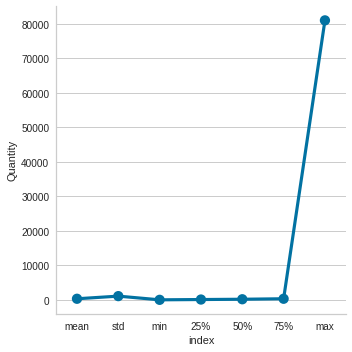

In [ ]:
# descriptive statistics plot
describe_qnty_df = qtywise_ctr.describe()
describe_qnty_df.reset_index(inplace=True)
describe_qnty_df = describe_qnty_df[describe_qnty_df['index'] != 'count']
sns.factorplot(x='index', y='Quantity', data=describe_qnty_df,fontweight="bold")
plt.show()

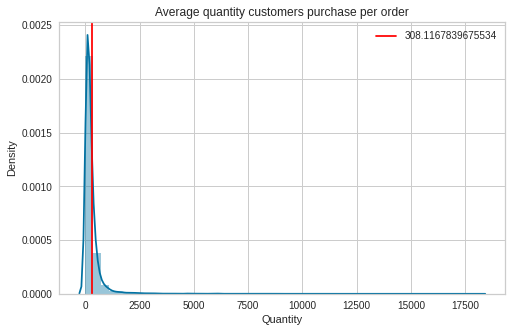

In [ ]:
# Average quantity customers purchase per order
data3= qtywise_ctr[qtywise_ctr['Quantity']<25930.0]
plt.figure(figsize=(8,5))
sns.distplot(data3['Quantity'])
plt.xlabel("Quantity")
xmean=qtywise_ctr['Quantity'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average quantity customers purchase per order");

# What is the average number of orders per customer?

In [ ]:
# average quantity
avg_qnty= qtywise_ctr.groupby(['CustomerID'],as_index=False).agg({'Quantity':'mean'}).rename(columns={'Quantity':'qnty/order'})
orders_df= qtywise_ctr['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID', 'CustomerID':'orders'}).sort_values(by='CustomerID')
avg_qnty= avg_qnty.merge(orders_df)
avg_qnty.head()

,CustomerID,qnty/order,orders
0,12346.0,74215.000000,1
1,12347.0,351.142857,7
2,12348.0,585.250000,4
3,12349.0,631.000000,1
4,12350.0,197.000000,1


In [ ]:
avg_qnty['orders'].describe()

count    4339.000000
mean        3.864024
std         5.952745
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       132.000000
Name: orders, dtype: float64

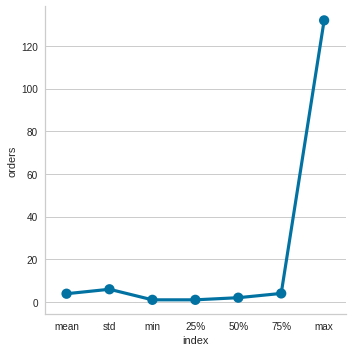

In [ ]:
describe_orders_df = avg_qnty.describe()
describe_orders_df.reset_index(inplace=True)
describe_orders_df = describe_orders_df[describe_orders_df['index'] != 'count']
sns.factorplot(x='index', y='orders', data=describe_orders_df)
plt.show()

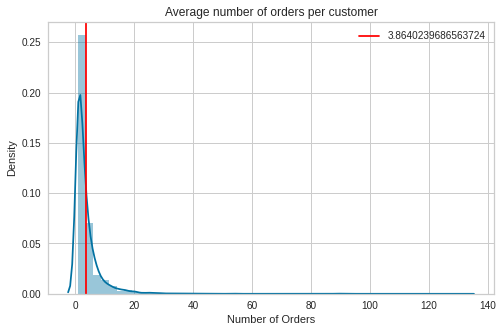

In [ ]:
# Average number of orders per customer
plt.figure(figsize=(8,5))
sns.distplot(avg_qnty['orders'])
plt.xlabel("Number of Orders")
xmean=avg_qnty['orders'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average number of orders per customer");

* **Customers have placed orders 4 or 5 times on average and maximum number of orders being 146 from a single customer.**

# Checking the distribution of numerical column to understand the data distribution is whether positively skewed, negative skewed or symetric.

* From the above plot , We are not find anything from this type of graph so we use log transformation it basically shrink the data from large to small scale

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

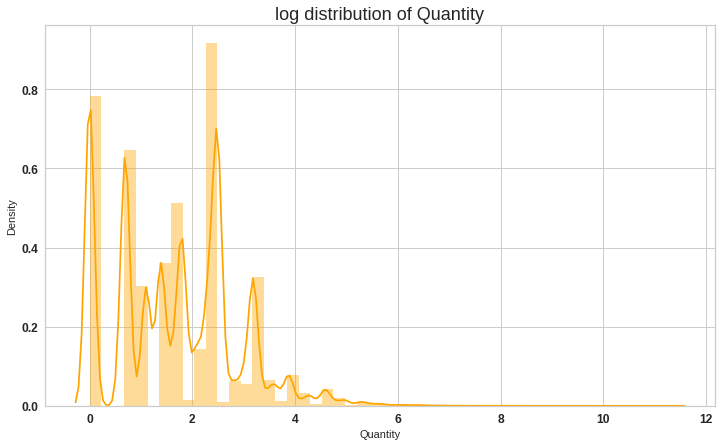

In [ ]:
#Log transformation on distribution of Quantity 
plt.figure(figsize=(12,7))
plt.title('log distribution of Quantity', SIZE =18)
sns.distplot(np.log(customer_seg_df['Quantity']),color="Orange")
plt.xticks(fontweight = 'bold' , fontsize = 12) # rotate the x-axis label by 45 degree angle
plt.yticks(fontweight = 'bold' , fontsize = 12)

* Now it is much better to understand the distibution of quantity column

# Find the sales within a week per day and find which day have maximum sales.
* We need to convert InvoiceDate column into proper date time format
* Create new column for day ,month ,year ,hour ,minute

# Convert InvoiceDate columns into date time format

In [ ]:
# Extracting new feature from Invoice Date

customer_seg_df["InvoiceDate"] = pd.to_datetime(customer_seg_df["InvoiceDate"], format="%Y-%m-%d %H:%M")
customer_seg_df['Day'] = customer_seg_df['InvoiceDate'].dt.day_name()        # Gives the name of the days like monday,tuesday,...
customer_seg_df["year"] = customer_seg_df["InvoiceDate"].apply(lambda x: x.year)
customer_seg_df["month_num"] = customer_seg_df["InvoiceDate"].apply(lambda x: x.month)
customer_seg_df["day_num"] = customer_seg_df["InvoiceDate"].apply(lambda x: x.day)
customer_seg_df["hour"] = customer_seg_df["InvoiceDate"].apply(lambda x: x.hour)
customer_seg_df["minute"] = customer_seg_df["InvoiceDate"].apply(lambda x: x.minute)
customer_seg_df['Month']=customer_seg_df['InvoiceDate'].dt.month_name()  # Creating new feature Month which gives the month like january, february, etc.
customer_seg_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Day,year,month_num,day_num,hour,minute,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December


* So,we have created mutiple columns and seperate day , month , year ,hour and minute from InvoiceNo column
* Now ,we can explore the daily and monthly sales.

# Checking sales day-wise

In [ ]:
# on which day most of the order is placed 
sort_order_week = ["Sunday", "Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday"]
day_df = pd.DataFrame(customer_seg_df['Day'].value_counts().reset_index().values,columns=['Week-Day','Total-Sales'])
day_df.index = pd.CategoricalIndex(day_df['Week-Day'],categories=sort_order_week,ordered=True)
day_df = day_df.sort_index().reset_index(drop=True)
day_df

,Week-Day,Total-Sales
0,Sunday,61214
1,Monday,64237
2,Tuesday,65747
3,Wednesday,68043
4,Thursday,79260
5,Friday,54231


Text(0.5, 1.0, 'Proportion of sales daily')

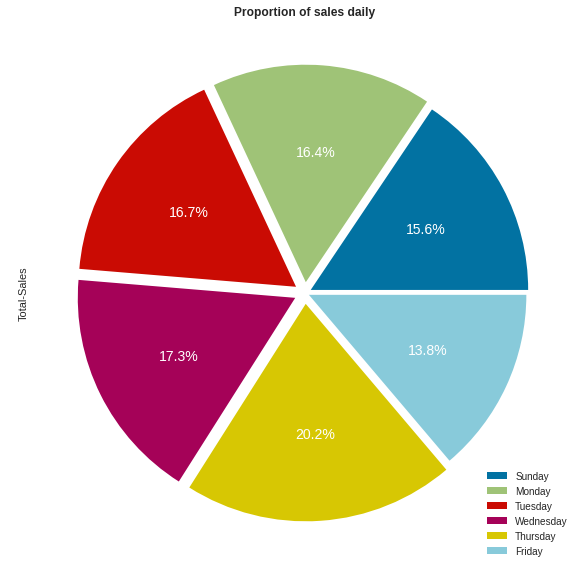

In [ ]:
from IPython.core.pylabtools import figsize
#  draw pie chart to shoe the percentage of sales per day
#  A wedge of a pie chart can be made to explode from the rest of the wedges of the pie chart using the explode parameter of the pie function.

explode = (0.03,0.05,0.05,0.05,0.05,0.02)
labels = ["Sunday", "Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday"]

#  startangle parameter is used to rotatate a pie chart by various angles
#  autopct parameter enables you to display the percent value using Python string formatting  
#  textprops parameter is used to change color and fontsize of values inside pie chart

day_df.plot.pie( y="Total-Sales",figsize=(10,10),explode=explode, autopct='%1.1f%%',labels=labels, textprops={'color':"w",'fontsize':14})
plt.title('Proportion of sales daily', weight='bold')  #  title to represent graph objective 


# Conclusion:
From the above pie chart we can say that:
* There is no sale on Saturday.
* Thursday have highest sale followed by Wednesday and Tuesday.

# Checking month-wise sales

In [ ]:
# Total sales monthly

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_df = pd.DataFrame(customer_seg_df['Month'].value_counts().reset_index().values,columns=['Month','Total-Sales'])
month_df.index = pd.CategoricalIndex(month_df['Month'],categories=ordered_months,ordered=True)
month_df = month_df.sort_index().reset_index(drop=True)
month_df

,Month,Total-Sales
0,January,20991
1,February,19707
2,March,26872
3,April,22435
4,May,28075
5,June,26926
6,July,26582
7,August,26796
8,September,39671
9,October,48796


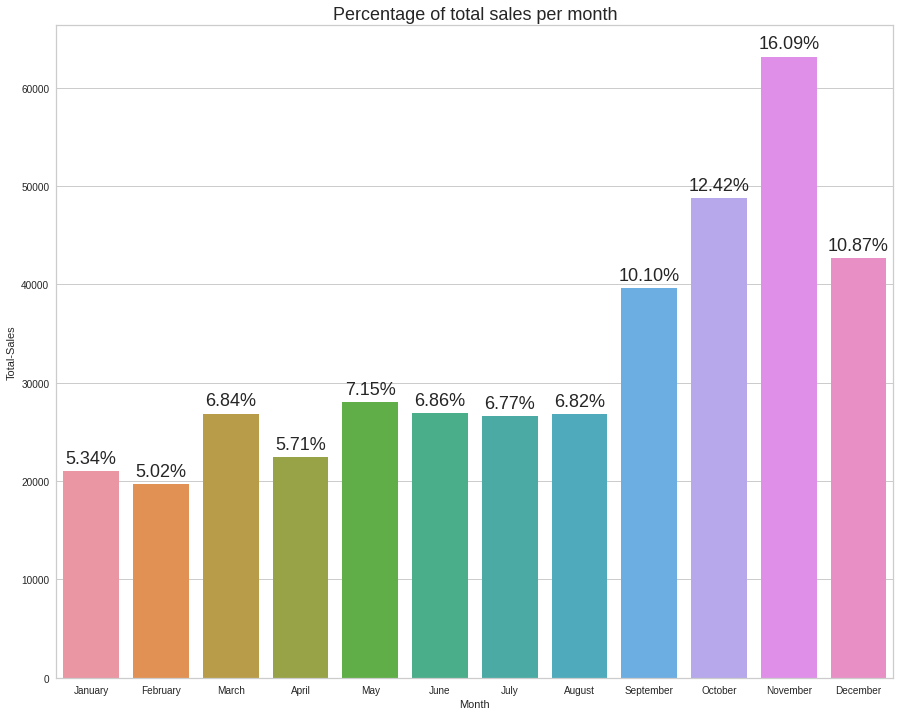

In [ ]:
# Plot the number of shopping as per days
fig, ax = plt.subplots(figsize = (15,12))
plt.title('Percentage of total sales per month', SIZE= 18)
sns.barplot(x= 'Month', y='Total-Sales',data=month_df)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/customer_seg_df.shape[0]*100),ha = "center", SIZE = 18)


# Create the RFM model (Recency, Frequency and Monetary value)

**Recency, frequency, monetary** value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: 
* **Recency:** How recently a customer has made a purchase
* **Frequency:** How often a customer makes a purchase
* **Monetary Value:** How much money a customer spends on purchases


**RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.**




**Performing RFM Segmentation and RFM Analysis:**
* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.However, this approach does not require machine learning algorithms as segmentation can be done manually.




* **Recency = Latest Date - Last Inovice Data**
* **Frequency = Count of invoice no. of transaction(s)**
* **Monetary = Sum of total amount for each customer**

**We need to create a new feature named as Amount to calculate total amount for each customer and find Monetary value.**

In [ ]:
customer_seg_df['Amount'] = customer_seg_df['Quantity'] * customer_seg_df['UnitPrice']

In [ ]:
customer_seg_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Day,year,month_num,day_num,hour,minute,Month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,2010,12,1,8,26,December,20.34


In [ ]:
import datetime as dt

# Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Create RFM Modelling scores for each customer
rfm_df = customer_seg_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Amount': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={  'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


**If we pick 1st customer represented by CustomerID i.e 12346 its, Recency = 325, Frequency = 1, & Monetary = 77183 (dollar), which is higher as compared to other CustomerID, so we make an assumption that some discount or offer was going on during that time of purchase.**

# Checking outliers using box plot in recency,frequency and monetary values

Text(0.5, 0, 'Attribute - Recency')

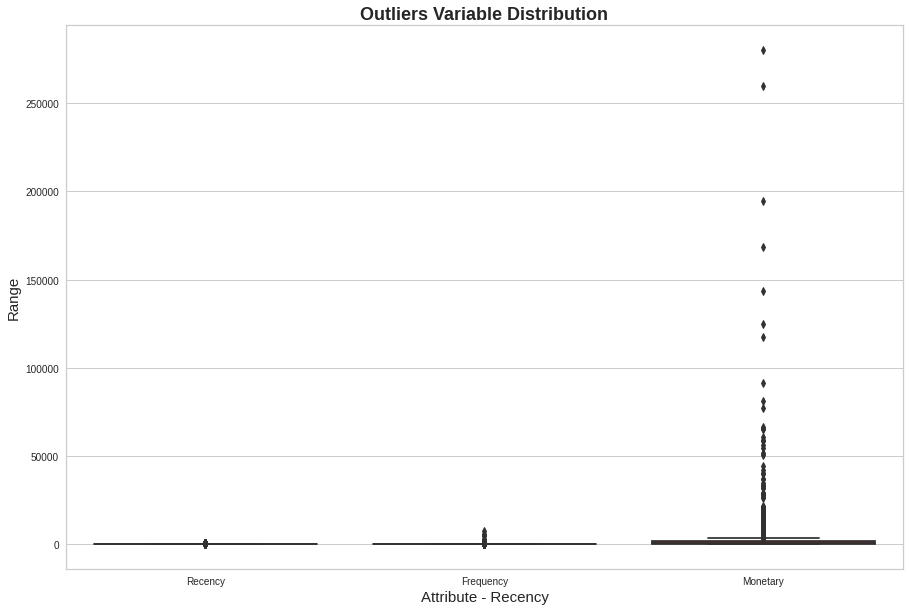

In [ ]:
# Box plot of Recency, Frequency and Monetary
plt.rcParams['figure.figsize'] = [15,10]
sns.boxplot(data = rfm_df[['Recency','Frequency','Monetary']])
plt.title("Outliers Variable Distribution", size = 18, weight = 'bold')
plt.ylabel("Range", size = 15)
plt.xlabel("Attribute - Recency", size = 15)

# Removing the outliers
* In order to drop the outliers here we using IQR to finding out how many outliers are there to drop them.

In [ ]:
# removing (statistical) outliers
# outlier treatment for Recency
Q1 = rfm_df.Recency.quantile(0.05)
Q3 = rfm_df.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df [(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for Frequency
Q1 = rfm_df.Frequency.quantile(0.05)
Q3 = rfm_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df  = rfm_df [(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

# outlier treatment for Monetary
Q1 = rfm_df.Monetary.quantile(0.05)
Q3 = rfm_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_df  = rfm_df [(rfm_df.Monetary >= Q1 - 1.5*IQR) & (rfm_df.Monetary <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attribute - Recency')

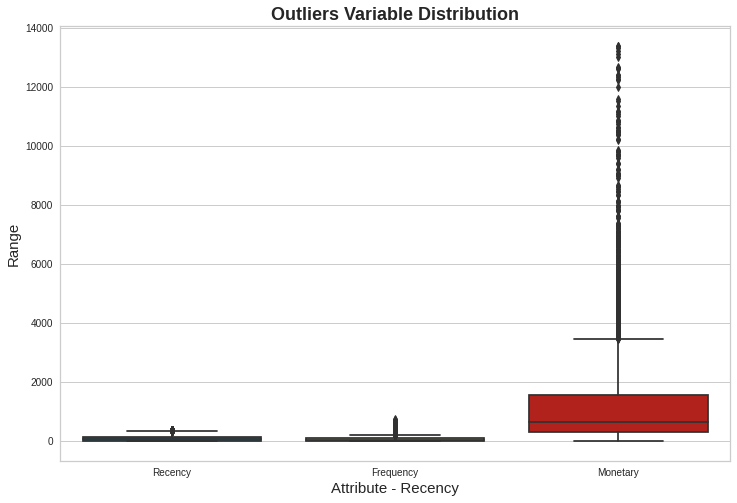

In [ ]:
# After removing outliers again check the boxplot for Recency, Frequency and Monetary
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = rfm_df[['Recency','Frequency','Monetary']])
plt.title("Outliers Variable Distribution", size = 18, weight = 'bold')
plt.ylabel("Range", size = 15)
plt.xlabel("Attribute - Recency", size = 15)

* Outliers are not removed even after using IQR technique to remove the outliers.

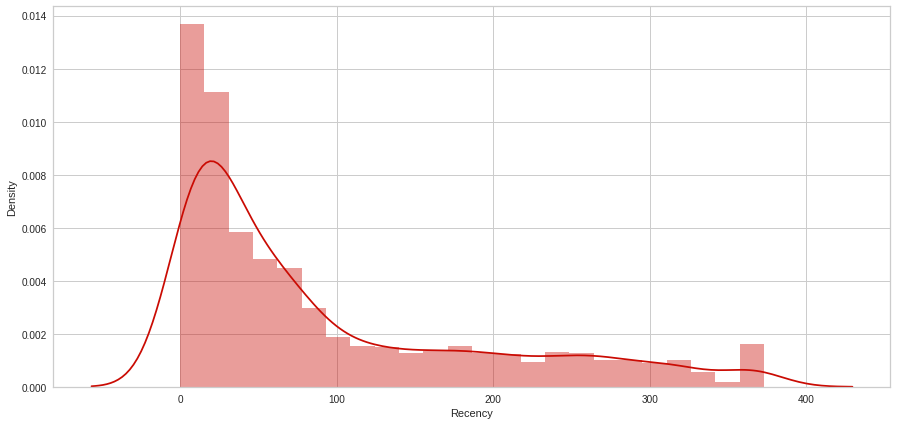

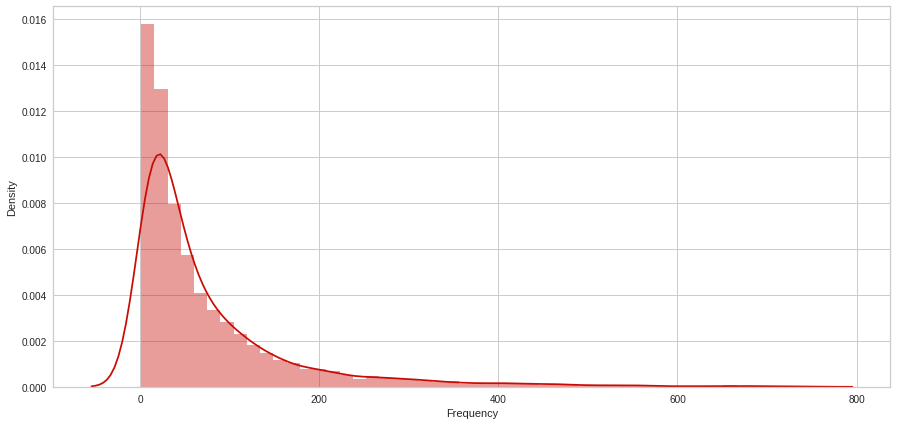

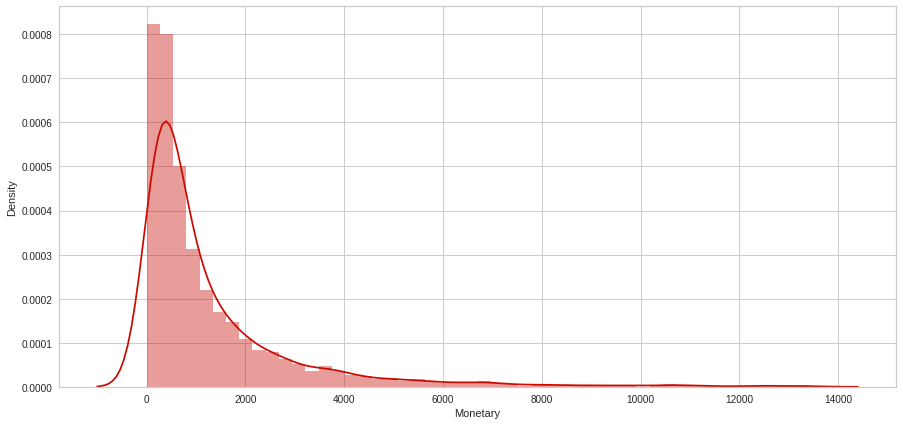

In [ ]:
# Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(15,7))
sns.distplot(x, color = 'R')

# Frequency distribution plot
x = rfm_df['Frequency']
plt.figure(figsize=(15,7))
sns.distplot(x, color = 'R')

# Monetary distribution plot
x = rfm_df['Monetary']
plt.figure(figsize=(15,7))
sns.distplot(x, color = 'R')

# Conclusion:
From the above distribution plot,we conclude that:
* All the displots are right skewed.
* From recency displot,we can say that there are huge no. of customers who are purchasing the product frequently.
* Displots are not a normal distribution.

# Applying log transformation to Recency , Monetary and Frequency value

**Handling negative and infinity values before log transformation**

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
        
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

**Plot the distribution again**

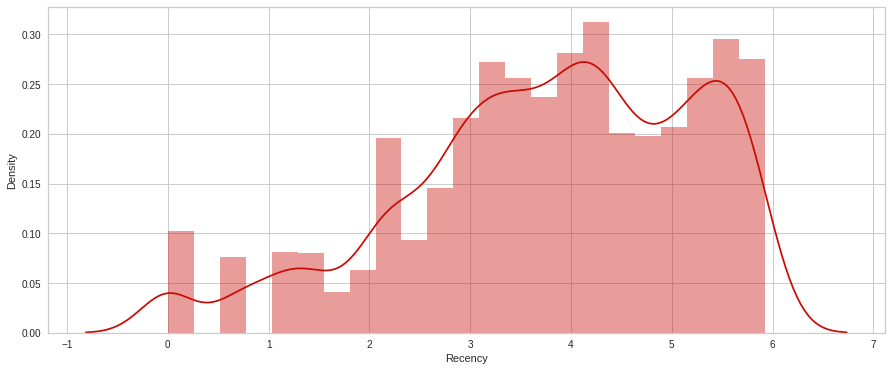

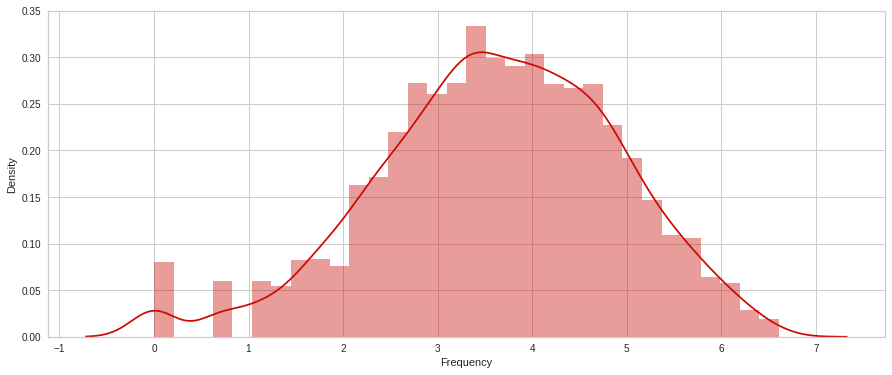

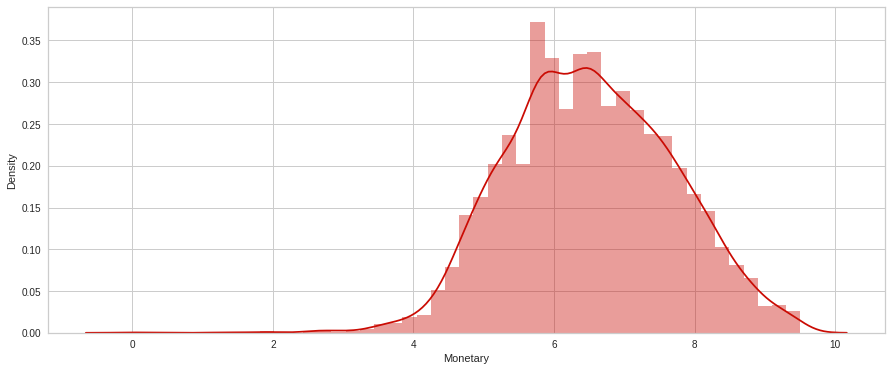

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(15,6))
sns.distplot(Recency_Plot, color = 'R')

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(15,6))
sns.distplot(Frequency_Plot, color = 'R')

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(15,6))
sns.distplot(Monetary_Plot, color = 'R')

**Now, the displots are nearly to normal distribution**

# Split into four segments using quantiles to find RFM score

* Dividing into segments is totally depends on our business requirements.

In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles 

{'Frequency': {0.25: 17.0, 0.5: 39.0, 0.75: 95.0},
 'Monetary': {0.25: 302.5775, 0.5: 651.745, 0.75: 1564.6025},
 'Recency': {0.25: 18.0, 0.5: 52.0, 0.75: 145.0}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d): # everyday to come to store the best is the customer ,here 1 is best and 4 is worst recency score
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d): # the higher the product purchasing is the best customer, here 4 is worst and 1 is best frequency and monetary score
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,1,2,1
12350.0,310,17,334.40,4,4,3
12352.0,36,85,2506.04,2,2,1


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,1,2,1,121,4
12350.0,310,17,334.40,4,4,3,443,11
12352.0,36,85,2506.04,2,2,1,221,5


In [ ]:
# Assign Loyalty level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm_df.RFMScore, q =4, labels = Loyalty_Level)
rfm_df['RFM_Loyalty_Level'] = Score_cuts.values
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
1,12348.0,75,31,1797.24,3,3,1,331,7,Gold
2,12349.0,18,73,1757.55,1,2,1,121,4,Platinum
3,12350.0,310,17,334.40,4,4,3,443,11,Bronze
4,12352.0,36,85,2506.04,2,2,1,221,5,Platinum


In [ ]:
# RFMScore Loyalty_Level is Platinum then they are my best set of customer
print(rfm_df[rfm_df['RFMScore']<= 5].sort_values('Monetary', ascending = False).reset_index().head(10))
rfm_df[rfm_df['RFMScore'] <= 5].shape

   CustomerID  Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
0     12540.0       19        478  13400.24  2  1  1      211         4   
1     12433.0        1        420  13375.87  1  1  1      111         3   
2     15498.0        2        512  13316.40  1  1  1      111         3   
3     12477.0       22        300  13219.74  2  1  1      211         4   
4     17735.0        2        690  13110.02  1  1  1      111         3   
5     16525.0        2        183  13027.45  1  1  1      111         3   
6     14258.0        9        111  12669.98  1  1  1      111         3   
7     13078.0        3        358  12627.94  1  1  1      111         3   
8     12536.0       43        261  12601.83  2  1  1      211         4   
9     15640.0        4        476  12416.11  1  1  1      111         3   

  RFM_Loyalty_Level  
0          Platinum  
1          Platinum  
2          Platinum  
3          Platinum  
4          Platinum  
5          Platinum  
6          Platinum 

(1238, 9)

**1238 are best valuable customers for the market.**

# Pair plot for Recency , Frequency and Monetary

In [ ]:
rfm_data = rfm_df[["Recency", "Frequency", "Monetary"]]
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04


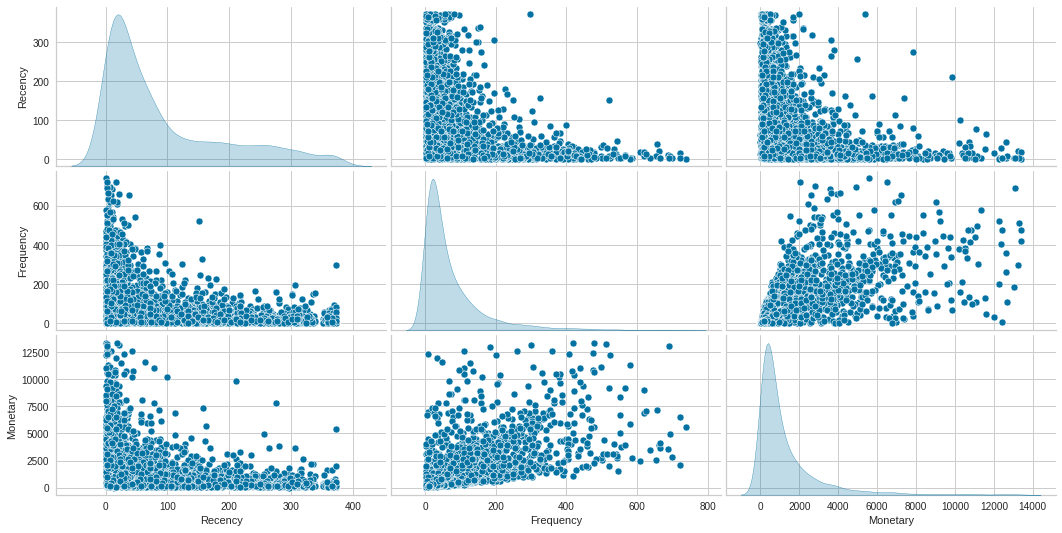

In [ ]:
sns.pairplot(rfm_data, diag_kind="kde", aspect=2);

# **MODELLING**


# **1. K-MEANS CLUSTERING**

In [ ]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features = rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:
X # Scaled values

array([[-2.1386459 ,  1.23456039,  1.58310122],
       [ 0.37286733, -0.15074451,  0.83575581],
       [-0.61606326,  0.51957307,  0.81667555],
       ...,
       [-1.27053475, -0.89354196, -1.13960505],
       [-1.85767593,  2.31198112,  0.94632131],
       [-0.02892209,  0.48672981,  0.85458207]])

#Silhouette Analysis:-

* Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

* Silhouette Score = p−q / max(p,q)
     * p is the mean distance to the points in the nearest cluster that the data point is not a part of

     * q is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1.

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster.

* A score closer to -1 indicates that the data point is not similar to the data points in the cluster.



For n_clusters = 2 The average silhouette_score is : 0.39408103379054493
For n_clusters = 3 The average silhouette_score is : 0.29475936365115435
For n_clusters = 4 The average silhouette_score is : 0.2975051811313832
For n_clusters = 5 The average silhouette_score is : 0.28291048922517165
For n_clusters = 6 The average silhouette_score is : 0.2624852862941338
For n_clusters = 7 The average silhouette_score is : 0.2678763390373605
For n_clusters = 8 The average silhouette_score is : 0.2685289240195684


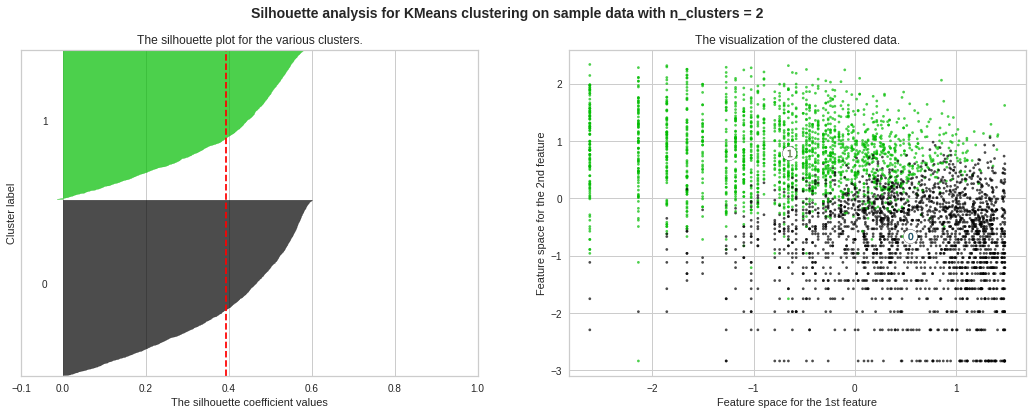

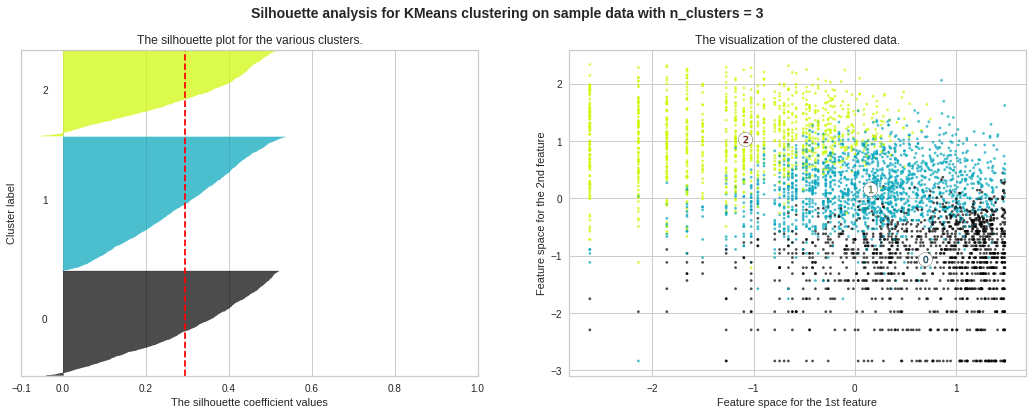

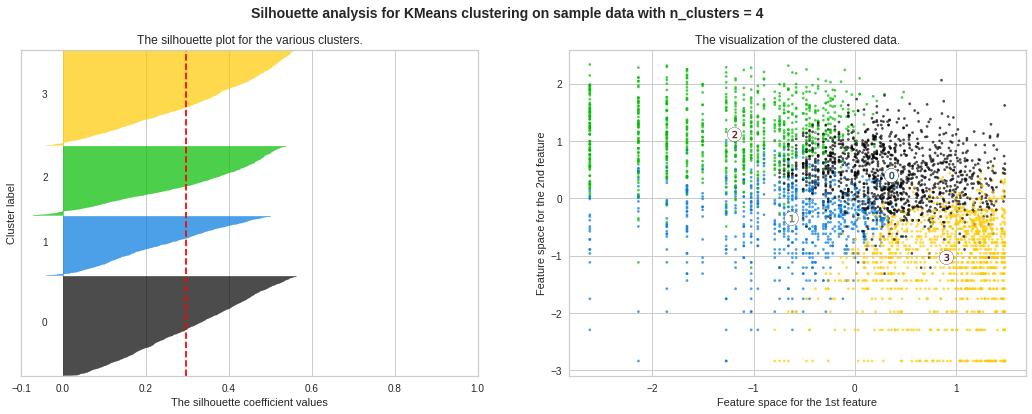

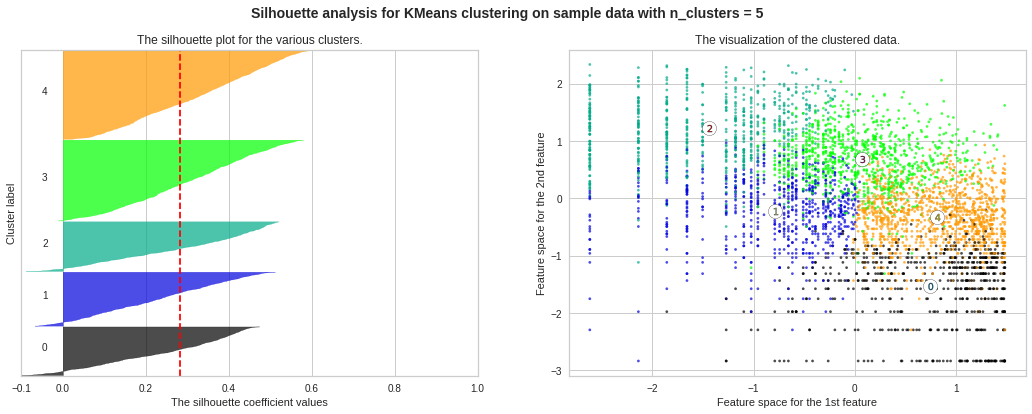

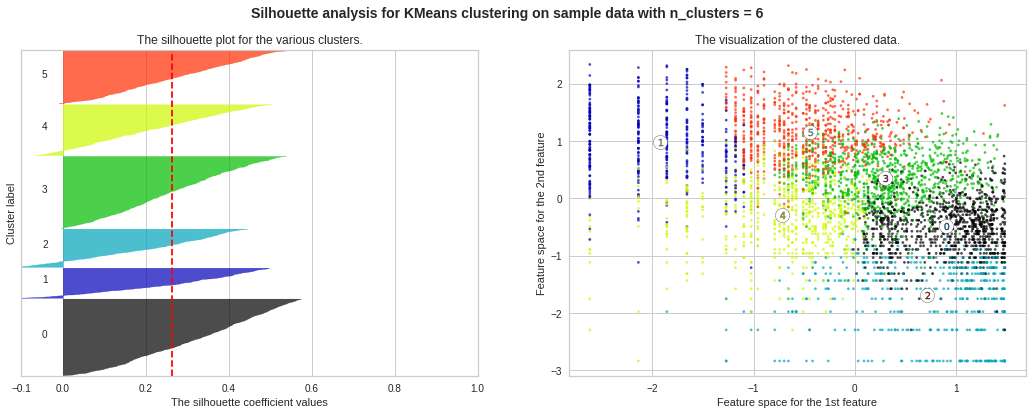

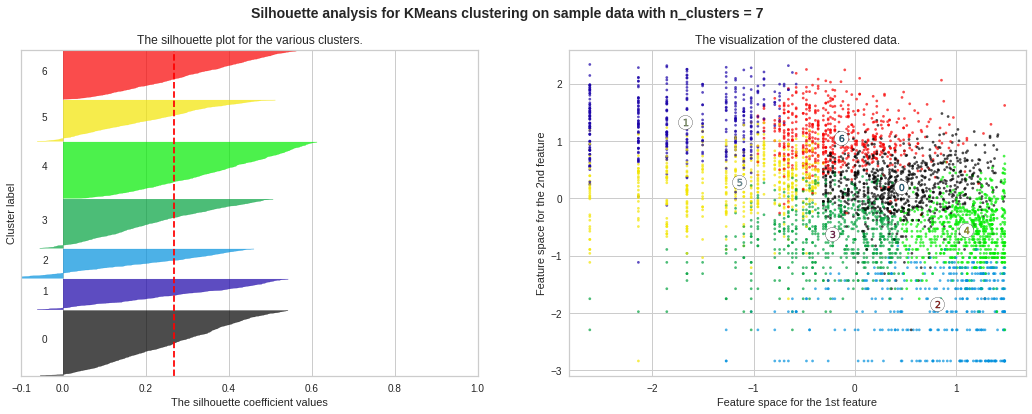

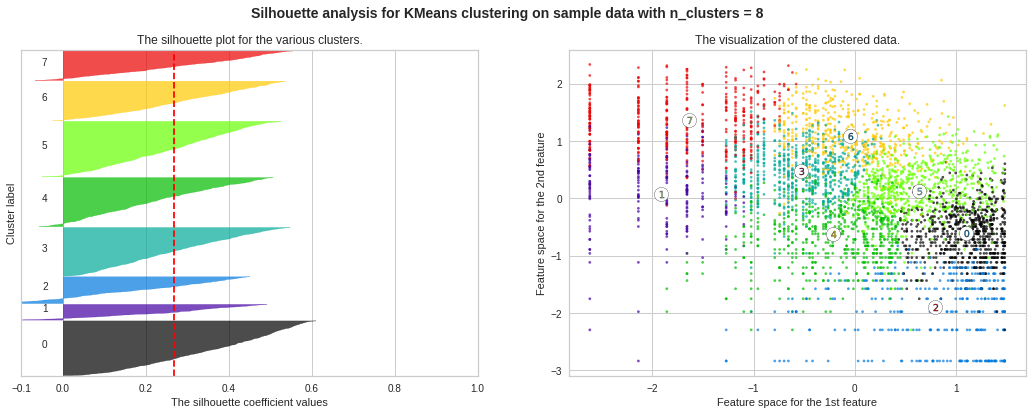

In [ ]:
from sklearn.metrics import silhouette_score                    # the silhouette code you will get from the google
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

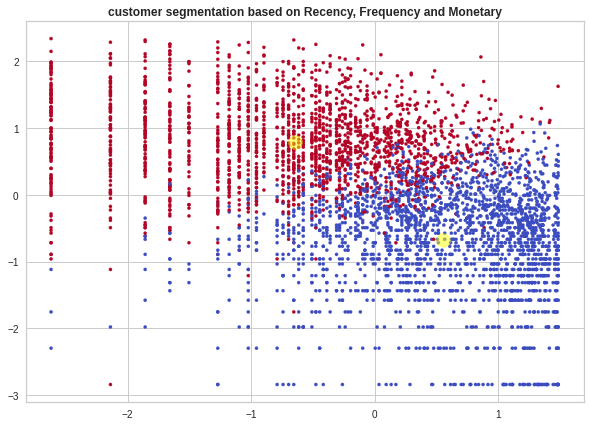

In [ ]:
plt.figure(figsize=(10,7))
plt.title('customer segmentation based on Recency, Frequency and Monetary',fontweight="bold")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='coolwarm')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

# Applying Elbow Method on Recency ,Frequency and Monetary

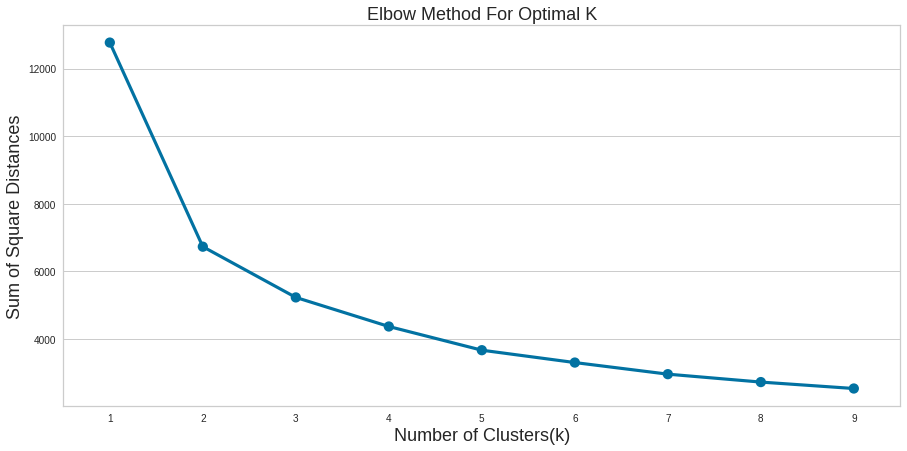

In [ ]:
sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)', SIZE = 18)
plt.ylabel('Sum of Square Distances', SIZE = 18)
plt.title('Elbow Method For Optimal K', SIZE = 18)
plt.show()

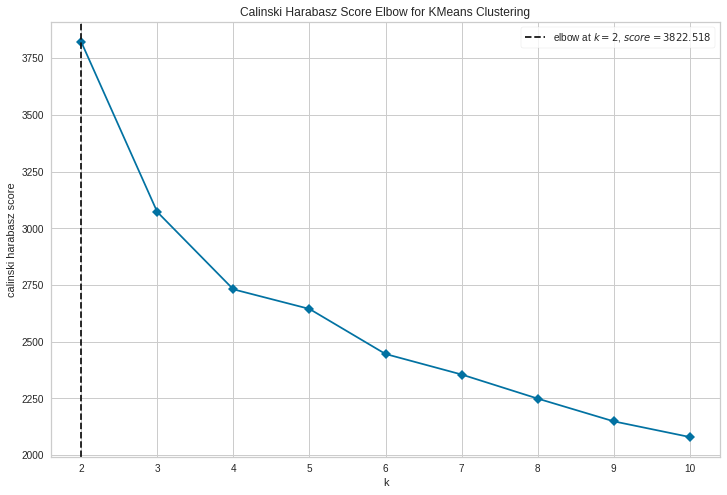

In [ ]:
# taking calinski_harbasz score as the metric
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

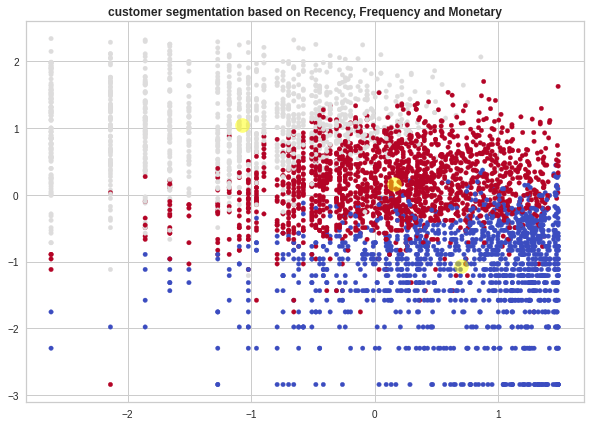

In [ ]:
plt.figure(figsize=(10,7))
plt.title('customer segmentation based on Recency, Frequency and Monetary',fontweight="bold")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='coolwarm')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

* **We see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary**

In [ ]:
# Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)  # KMeans with 3 clusters
KMean_clust.fit(X)        # Fitting the model to the data

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,2
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,1,2,1,121,4,Platinum,2.890372,4.290459,7.471676,2
12350.0,310,17,334.40,4,4,3,443,11,Bronze,5.736572,2.833213,5.812338,1
12352.0,36,85,2506.04,2,2,1,221,5,Platinum,3.583519,4.442651,7.826459,2
12353.0,204,4,89.00,4,4,4,444,12,Bronze,5.318120,1.386294,4.488636,1
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,0
12355.0,214,13,459.40,4,4,3,443,11,Bronze,5.365976,2.564949,6.129921,1
12356.0,22,59,2811.43,2,2,1,221,5,Platinum,3.091042,4.077537,7.941449,2


In [ ]:
# Grouping by clusters to understand the profiles
rfm_df.groupby('Cluster').mean()

,Recency,Frequency,Monetary,R,F,M,RFMScore,Recency_log,Frequency_log,Monetary_log
Cluster,,,,,,,,,,
0,82.837884,57.126280,946.844956,2.577361,2.321957,2.365757,7.265074,3.991121,3.839522,6.621907
1,169.600725,13.256522,265.082907,3.286957,3.714493,3.637681,10.639130,4.779231,2.282069,5.341287
2,16.387299,181.815742,3159.168551,1.362254,1.330948,1.306798,4.000000,2.212366,4.951390,7.798888


In [ ]:
# Number of customers belonging to each cluster
rfm_df['Cluster'].value_counts()

0    1758
1    1380
2    1118
Name: Cluster, dtype: int64

# Conclusion:
* **Cluster 0:** comprises of customers who are very recent, frequent and also contribute largely to the sales.
* **Cluster1:** comprises of customers who are moderately recent, frequent and contribute an average amount to sales
* **Cluster2:** comprises of customers who made purchaces a long time ago and purchase infrequently and contribute the least towards the sales of the company.

# Hierarchical clustering
* **Hierarchical clustering takes away the problem of having to pre-define the number of clusters.**
* **There are mainly two types of hierarchical clustering:**
      1. Agglomerative hierarchical clustering
      2. Divisive Hierarchical clustering




# 1.Agglomerative hierarchical clustering:
* **Bottom Up Approach -** We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning.
* Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left.
* We are merging (or adding) the clusters at each step, right? Hence, this type of clustering is also known as additive hierarchical clustering.

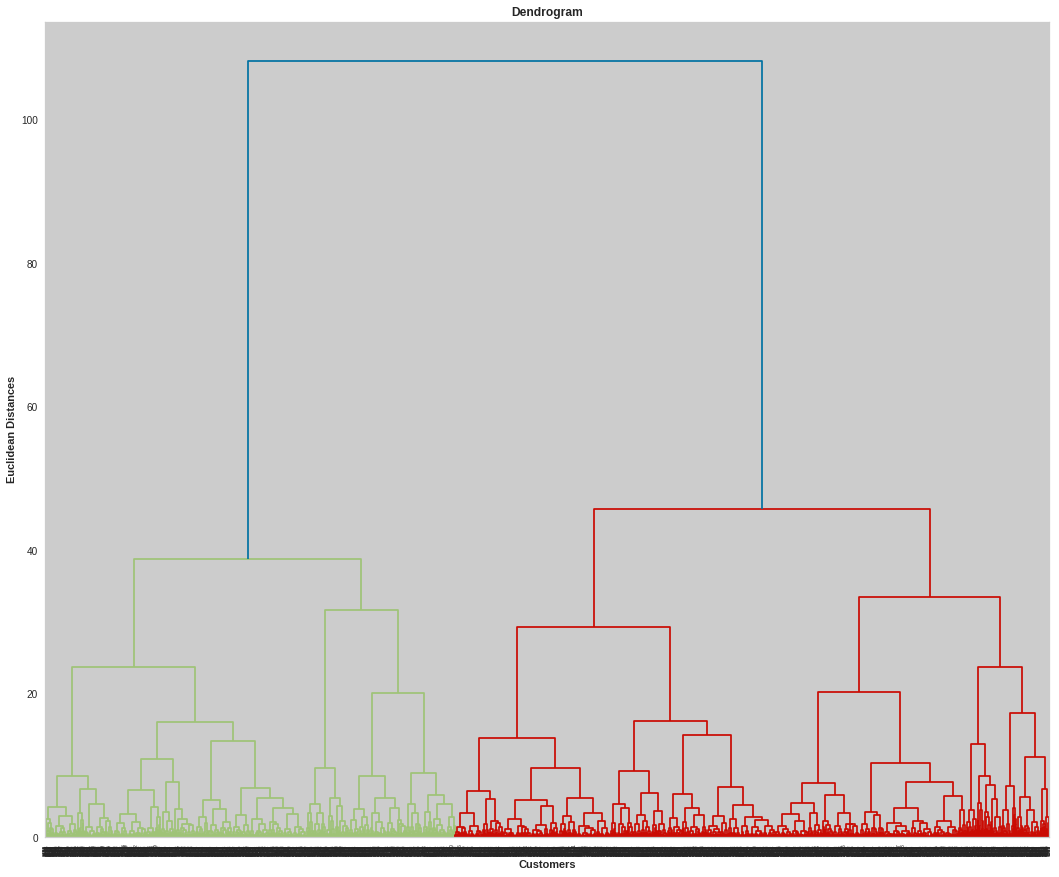

In [ ]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize = (18,15))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontweight="bold")
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

## <b> How should we Choose the Number of Clusters in Hierarchical Clustering? </b>

* ### A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters. 

* ### We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). 


# We choose threshold value to be 50 and 40 and see the difference in no. of clusters.

# Set threshold value to be 50

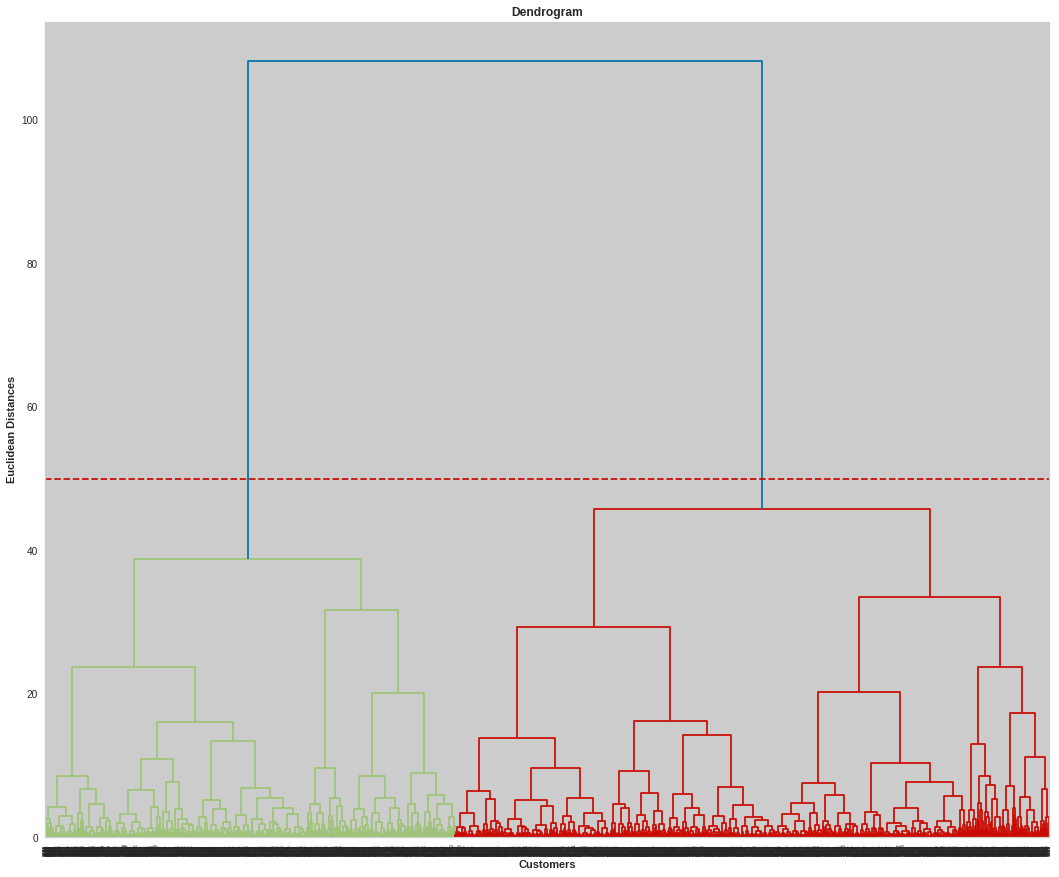

In [ ]:
plt.figure(figsize = (18,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontweight="bold")
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.axhline(y=50, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

# Conclusion:
* ### The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. </b>

* ### Here,No. of Cluster  = 2

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

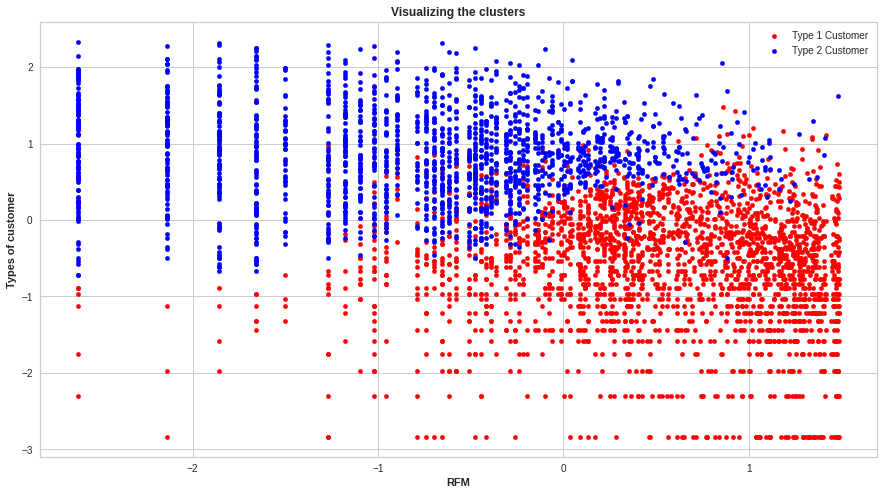

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Type 1 Customer')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Type 2 Customer')
plt.title("Visualizing the clusters",fontweight="bold")
plt.xlabel('RFM',fontweight="bold")
plt.ylabel('Types of customer',fontweight="bold")
plt.legend()
plt.show()

# Conclusion:
* ### Clusters data points are well-separated.
* ### 2 is optimal no. of clusters

# Set threshold value to be 40

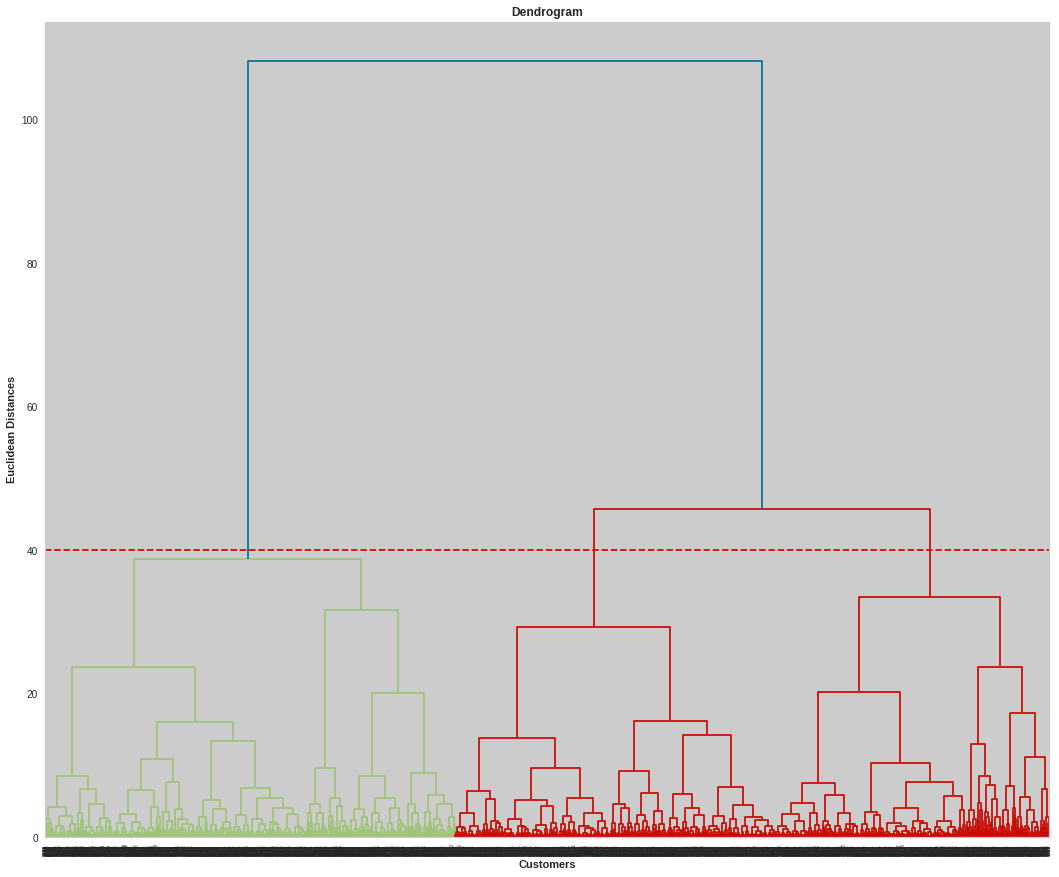

In [ ]:
plt.figure(figsize = (18,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontweight="bold")
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.axhline(y=40, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to the online retail dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Type 1 Customer')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Type 2 Customer')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = 'green', label = 'Type 3 Customer')
plt.title("Visualizing the clusters ")
plt.xlabel('RFM',fontweight="bold")
plt.ylabel('Types of customers',fontweight="bold")
plt.legend()
plt.show()

# Conclusion:
From the above dotted graph:
* When no. of cluster is 3 ,then some datapoints in different clusters are overlapping with each other.
* They are not well seperated.


# **Types of Linkage:**

In [ ]:
# import the required linkage package
from scipy.cluster.hierarchy import linkage


# **Single Linkage Hierarchical Clustering :-**
* **In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.**

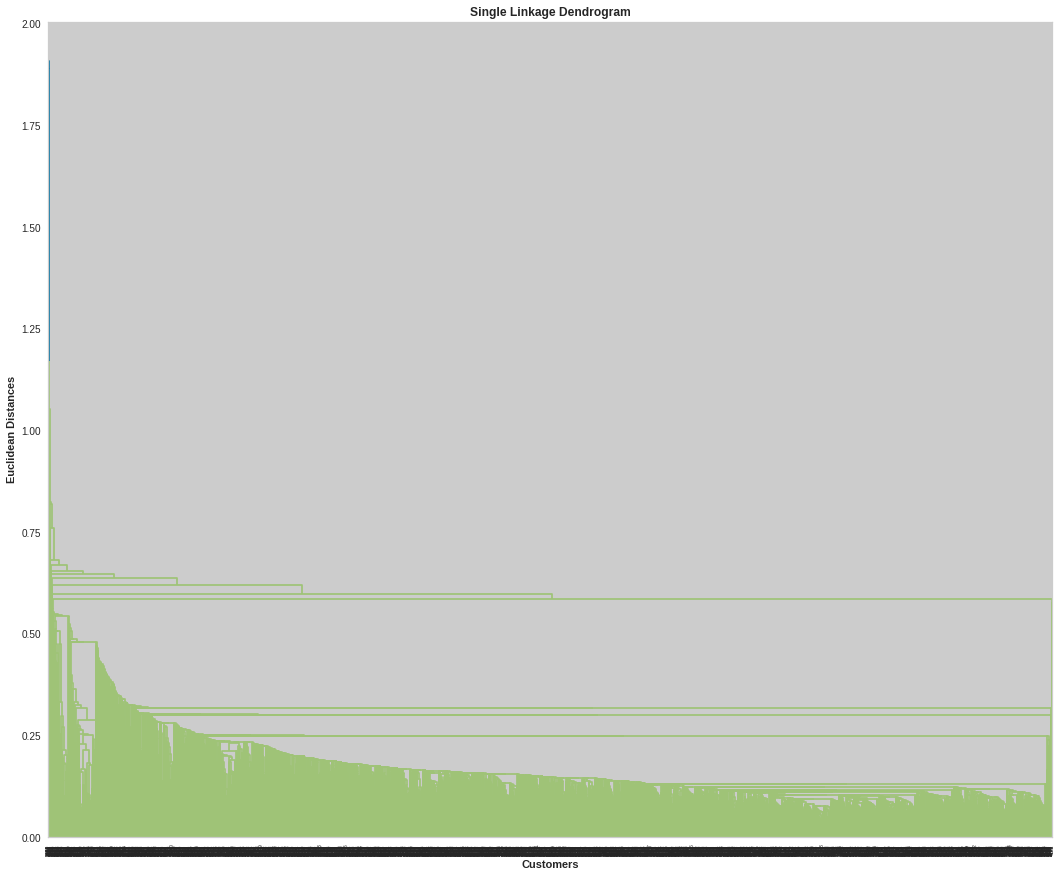

In [ ]:
# Sinlge linkage plot for dendogram
plt.figure(figsize = (18,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Single Linkage Dendrogram',fontweight="bold")
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.show()

# **Complete Linkage Hierarchical Clustering :-**
* **In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.**

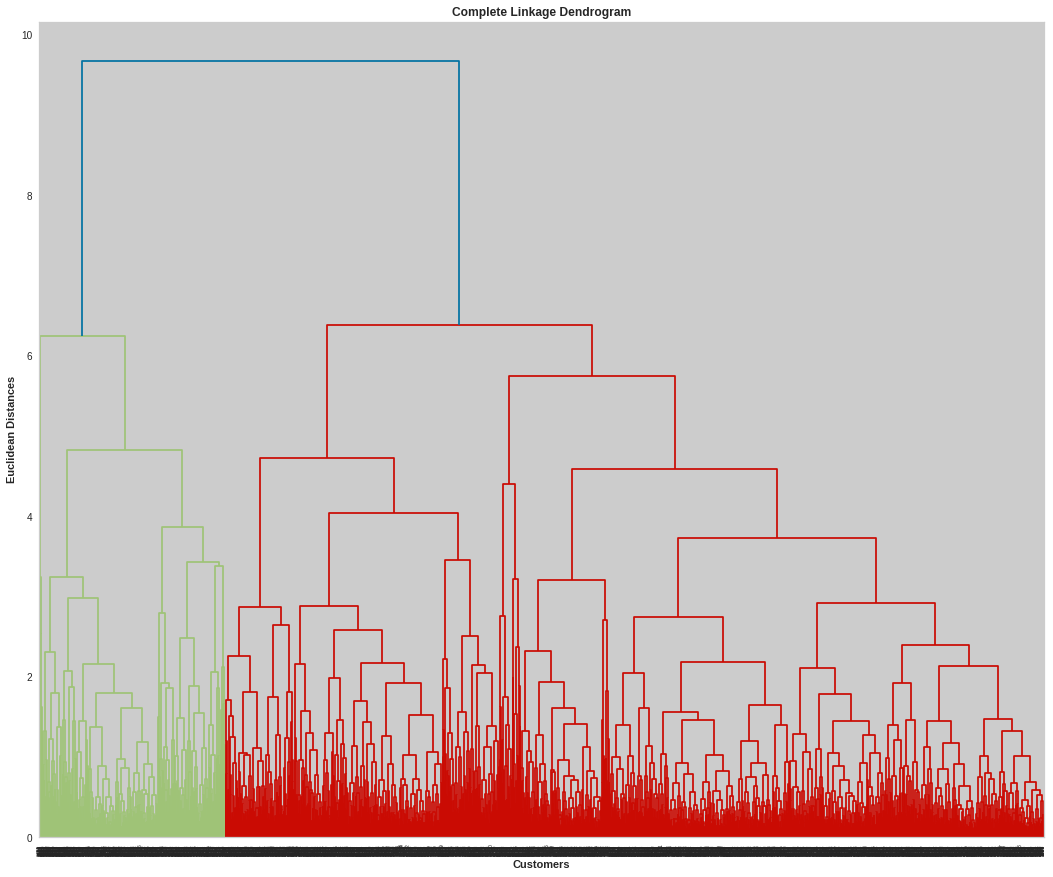

In [ ]:
# Complete linkage plot for dendrogram
plt.figure(figsize = (18,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Complete Linkage Dendrogram',fontweight="bold")
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.show()

# **Average Linkage Hierarchical Clustering :-**
* **In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.**

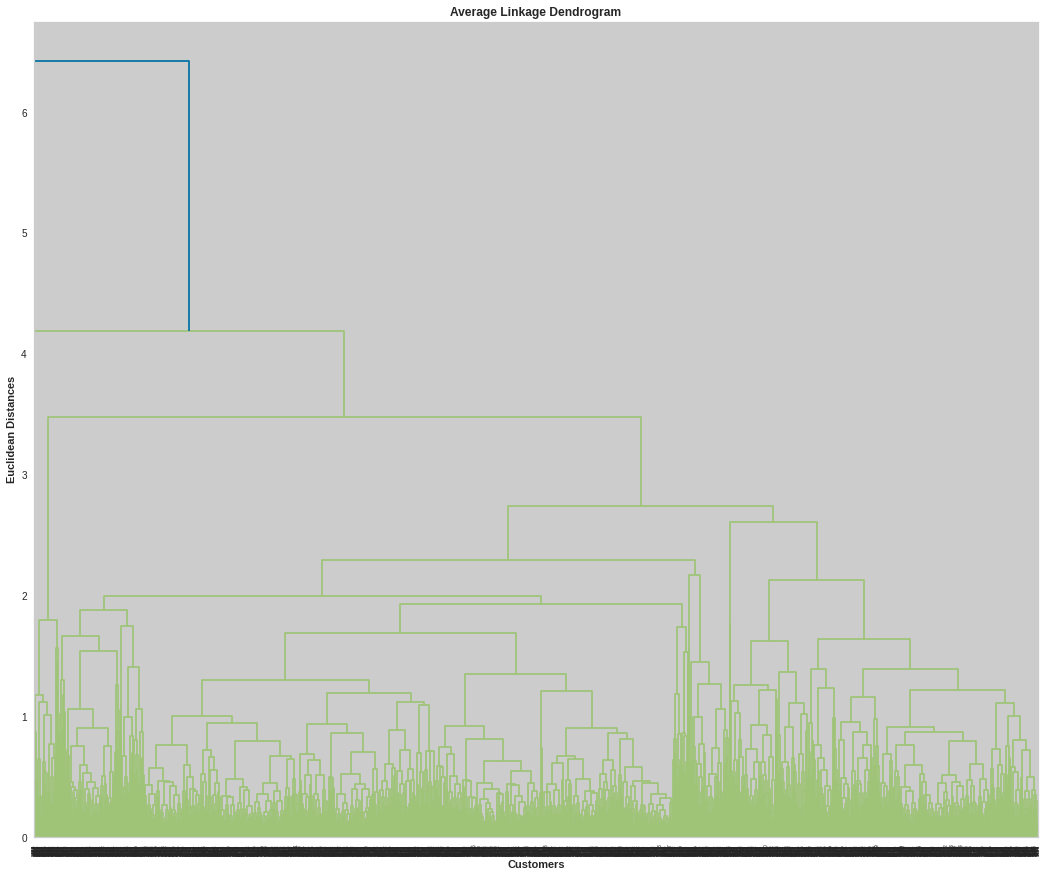

In [ ]:
# Average linkage plot for dendrogram
plt.figure(figsize = (18,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Average Linkage Dendrogram',fontweight="bold")
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.show()

# **Centroid Linkage Hierarchical Clustering :-**
* **In centroid linkage hierarchical clustering, the distance between two clusters is the distance between the two mean vectors of the clusters. At each stage of the process we combine the two clusters that have the smallest centroid distance.For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their respective centroids.**

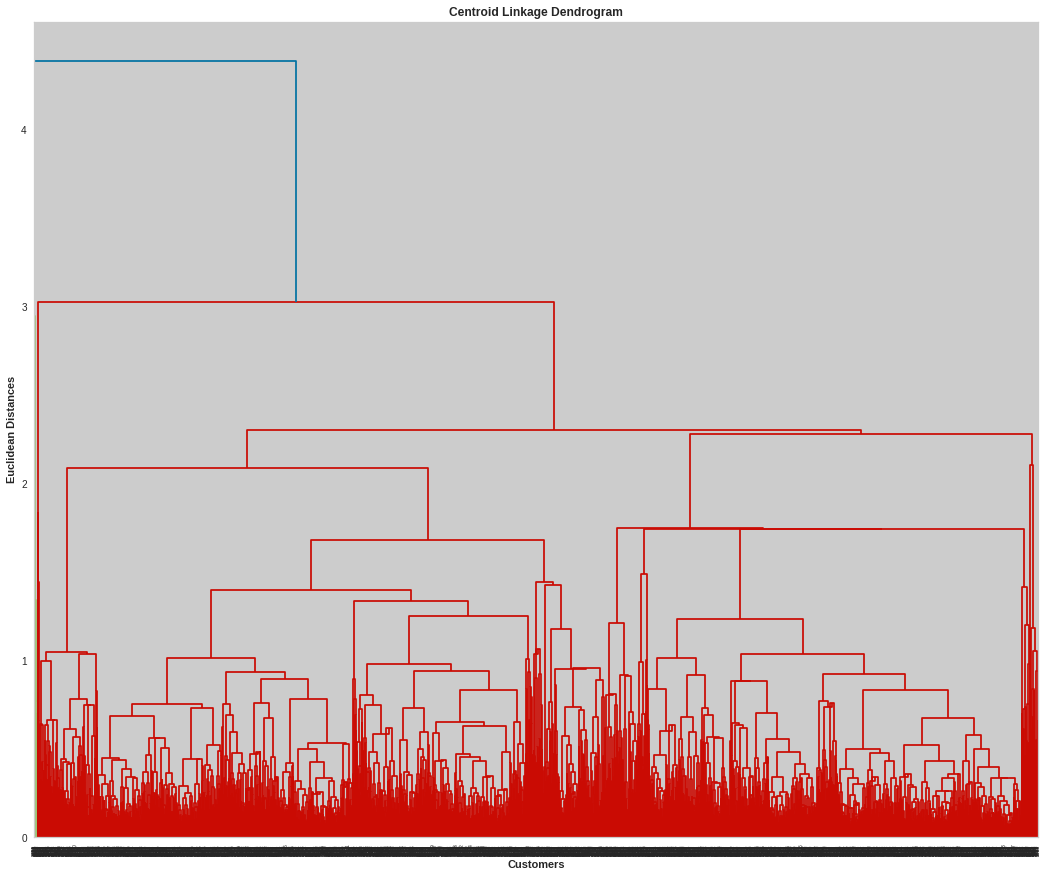

In [ ]:
# Centroid linkage plot for dendrogram
plt.figure(figsize = (18,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'centroid'))
plt.title('Centroid Linkage Dendrogram',fontweight="bold")
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.show()

# Final Table

In [ ]:
from prettytable import PrettyTable 
# Specify the Column Names while initializing the Table 
finalTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
# Add rows 
finalTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "3"]) 
finalTable.add_row(['2',"K-Means with Elbow method  ", "RFM", "3"])
finalTable.add_row(['3',"Agglomerative Hierarchical Clustering with threshold value 50", "RFM", "2"])
finalTable.add_row(['4',"Agglomerative Hierarchical Clustering with threshold value 40", "RFM", "3"])
print(finalTable)

+--------+---------------------------------------------------------------+------+---------------------------+
| SL No. |                           Model_Name                          | Data | Optimal_Number_of_cluster |
+--------+---------------------------------------------------------------+------+---------------------------+
|   1    |                 K-Means with silhouette_score                 | RFM  |             3             |
|   2    |                  K-Means with Elbow method                    | RFM  |             3             |
|   3    | Agglomerative Hierarchical Clustering with threshold value 50 | RFM  |             2             |
|   4    | Agglomerative Hierarchical Clustering with threshold value 40 | RFM  |             3             |
+--------+---------------------------------------------------------------+------+---------------------------+


# Conclusion:
* ### Throughout the analysis we went through various steps to perform customer segmentation. We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. 
* ### Next, we perform some exploratory data analysis and tried to draw observations from the features we had in the dataset.

* ### We saw how we can segment our customer depending on our business requirements. We perform RFM for our entire customer base.

* ### RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest.

* ### Using cluster profiling the average of recency, frequency and monetary values for each customer segment was identified.

* ### We have made dendograms for all types of linkages i.i. single,complete,average,centroid and ward.

* ### Ward is most popular among all linkages.

* ### We used the K-means algorithm to segment our customer in various clusters having similar similarity. K-means did a pretty good job here.
* ### We have use Agglomerative Hierarchical Clustering with different threshold value and see how clusters differ and find optimal no. of clustes.
* ### The optimal no. of clusters in Agglomerative clustering is 2.
* ### The optimal no. of clusters in K-means clustering with silhouette_score and Elbow method is 3.